## 공공데이터 상권정보 분석해보기
* https://www.data.go.kr/dataset/15012005/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다.
* 파일데이터에서 상권별 업종밀집통계정보를 다운로드 받습니다.

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
import pandas as pd
import numpy as np
import re

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Window 의 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

### 상가업소정보 2019년 6월

In [6]:
# 상가업소정보 2018년 6월 데이터
shop_2019_06 = pd.read_csv('../data/commercial_store/소상공인시장진흥공단_상가업소정보_201906_01.csv')
shop_2019_06.shape

(565016, 39)

In [7]:
shop_2019_06.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
2,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774


In [8]:
shop_2019_06.tail(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
565013,16283091,원클래스독서실,NaN,R,학문/교육,R10,도서관/독서실,R10A01,독서실,R90212,...,2626010800112480004011513,월드메디컬타워,부산광역시 동래구 아시아드대로 239-1,607841,47851.0,NaN,2,202,129.067468,35.205469
565014,16287899,에스에스엠,NaN,D,소매,D12,가전제품소매,D12A05,전화기판매,G47312,...,2638010300105220024033909,선경아트빌,부산광역시 사하구 낙동남로1367번길 16,604853,49314.0,NaN,NaN,101,128.961386,35.107213
565015,16286754,천사통신,NaN,D,소매,D12,가전제품소매,D12A05,전화기판매,G47312,...,2614011800100170005012010,NaN,부산광역시 서구 구덕로124번길 27,602055,49246.0,NaN,NaN,NaN,129.022555,35.097951


In [9]:
shop_2019_06.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [10]:
view_columns = ['상호명','지점명','상권업종대분류명','상권업종중분류명',
               '상권업종소분류명','시도명','시군구명','행정동명',
               '법정동명','지번주소','경도','위도']
shop_2019_06[view_columns].head(10)

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,경도,위도
0,커피빈코리아선릉로93길점,코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 역삼동 696-42,127.047883,37.505675
1,프로포즈,NaN,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 독산동 162-1,126.899220,37.471711
2,싱싱커피&토스트,NaN,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,부산광역시 사상구 괘법동 578,128.980455,35.159774
3,와라와라호프,NaN,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 대치동 604,127.061026,37.493922
4,가락사우나내스낵,NaN,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 석촌동 256,127.104071,37.500249
5,석봉토스트,NaN,음식,패스트푸드,토스트전문,서울특별시,광진구,구의2동,구의동,서울특별시 광진구 구의동 77-47,127.088387,37.549245
6,허술한집,NaN,음식,분식,라면김밥분식,서울특별시,강서구,공항동,공항동,서울특별시 강서구 공항동 45-89,126.809957,37.562013
7,피자마루,약수점,음식,패스트푸드,피자전문,서울특별시,중구,약수동,신당동,서울특별시 중구 신당동 372-95,127.010861,37.552153
8,홍능갈비,NaN,음식,한식,갈비/삼겹살,서울특별시,강서구,화곡1동,화곡동,서울특별시 강서구 화곡동 1086-3,126.836078,37.538927
9,초밥왕,NaN,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 신천동 7-28,127.102490,37.515149


In [11]:
# 생각보다 결측치가 많다.
shop_2019_06.isnull().sum()

상가업소번호            0
상호명               1
지점명          489492
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      32952
표준산업분류명       32952
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         97123
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        494164
건물관리번호            0
건물명          303808
도로명주소             0
구우편번호             0
신우편번호             9
동정보          514802
층정보          220463
호정보          481880
경도                0
위도                0
dtype: int64

### missingno로 결측치 보기 
- missingno는 별도의 설치가 필요하다

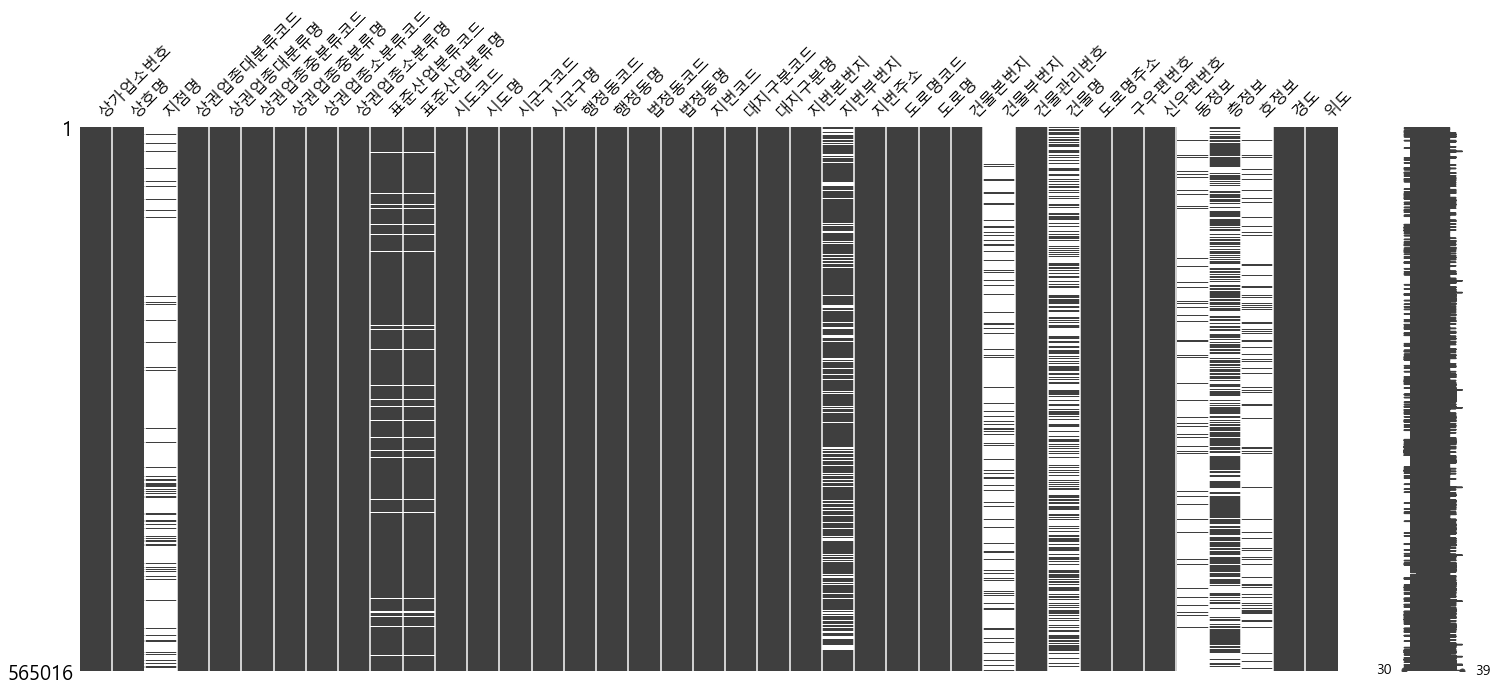

In [12]:
import missingno as msno

msno.matrix(shop_2019_06)

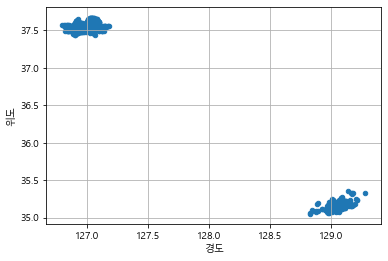

In [14]:
# Pandas의 plot 으로 위도와 경도를 산점도로 그려봅니다.
shop_2019_06[:1000].plot.scatter(x='경도',y='위도',grid=True)

In [20]:
# 데이터를 보니 서울과 부산만 있는거 같다.
# 그래서 서울과 그 외 데이터롤 나눠봤다.
shop_seoul = shop_2019_06.loc[shop_2019_06['도로명주소'].str.startswith('서울')]
shop_except_seoul=shop_2019_06.loc[~shop_2019_06['도로명주소'].str.startswith('서울')]
print(shop_seoul.shape)
print(shop_except_seoul.shape)

(401071, 39)
(163945, 39)


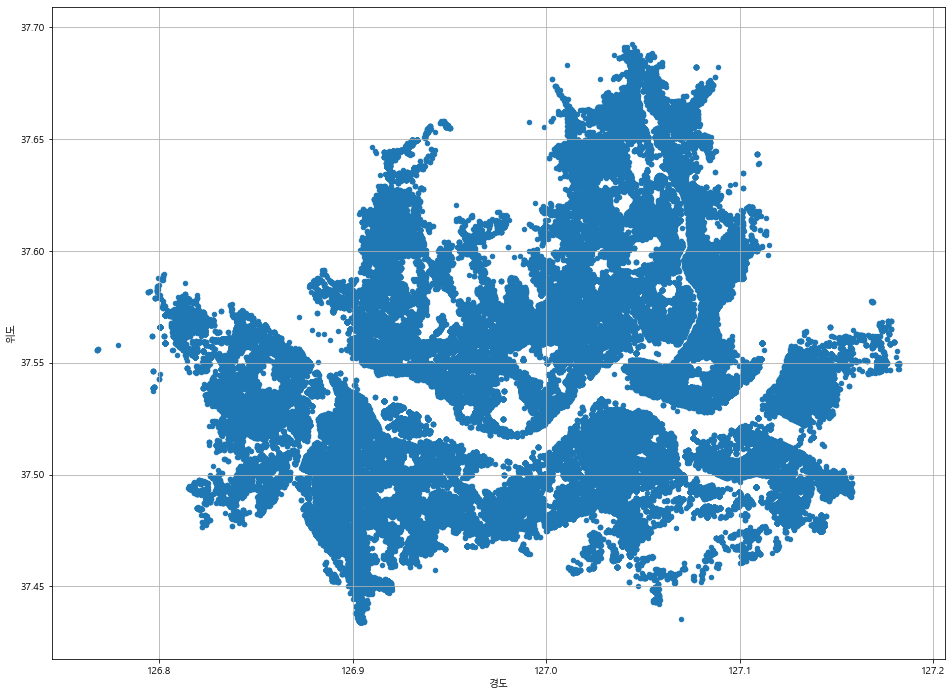

In [21]:
shop_seoul.plot.scatter(x='경도',y='위도',figsize=(16,12), grid=True)

In [22]:
shop_2019_06['도로명주소'].head()

0      서울특별시 강남구 선릉로93길 6
1      서울특별시 금천구 가산로 34-6
2        부산광역시 사상구 괘감로 37
3    서울특별시 강남구 남부순환로 2933
4        서울특별시 송파구 가락로 71
Name: 도로명주소, dtype: object

In [26]:
print(shop_2019_06.shape)
shop_2019_06['시도']=shop_2019_06['도로명주소'].str.split(' ',expand=True)[0]
shop_2019_06['구군']=shop_2019_06['도로명주소'].str.split(' ',expand=True)[1]
print(shop_2019_06.shape)
shop_2019_06.columns

(565016, 39)
(565016, 41)


Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도', '시도', '구군'],
      dtype='object')

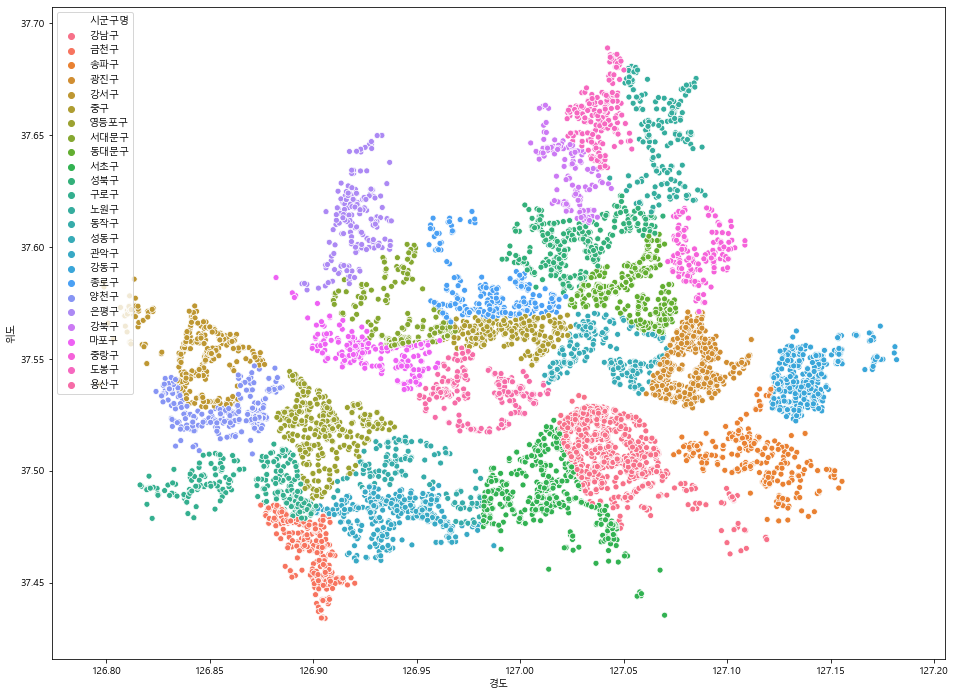

In [27]:
# seaborn을 통해 시각화 합니다.
# 전체 데이터를 그리면 속도가 너무 오래걸리기때문에
# 파이썬의 슬라이싱 기능을 활용해서 [:10000]개만 뽑아서
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_seoul[:10000], x='경도', y='위도', hue='시군구명')

In [28]:
shop_seoul['상권업종대분류명'].value_counts()

음식          131687
소매          124782
생활서비스        64344
학문/교육        31247
의료           18826
부동산          15430
관광/여가/오락     11578
숙박            3047
스포츠            130
Name: 상권업종대분류명, dtype: int64

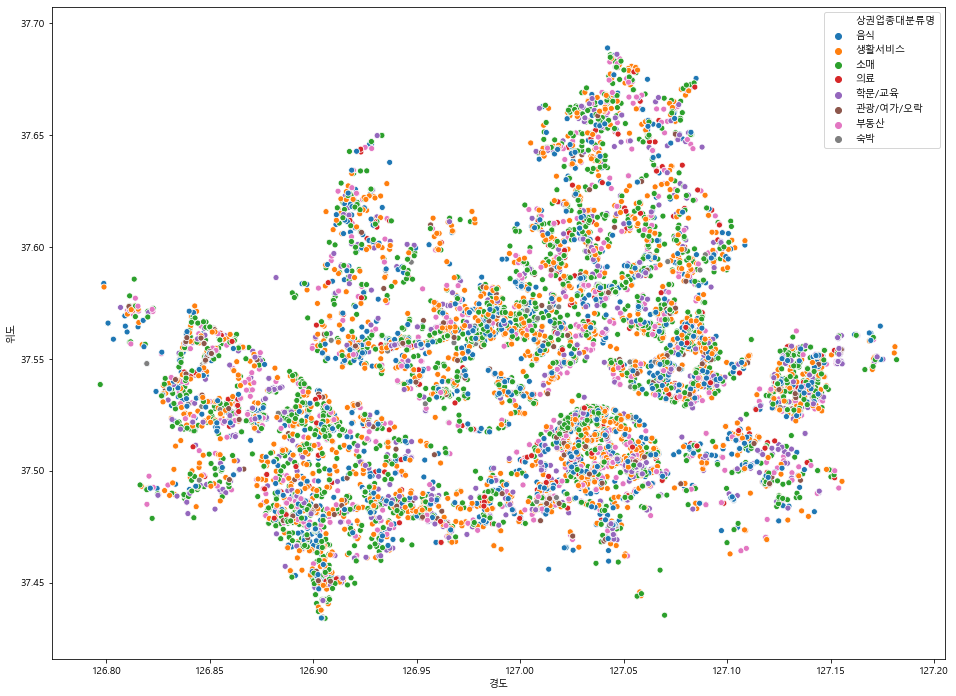

In [29]:
# 전체 데이터를 출럭하는데 시간이 너무 오래걸린다면
# data=shop_seoul 대신 data=shop_seoul[:10000]로 
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_seoul[:10000], x='경도',y='위도',hue='상권업종대분류명')

### 학문/교육과 관련된 정보 보기

In [30]:
shop_seoul_edu = shop_seoul[shop_seoul['상권업종대분류명']=='학문/교육']

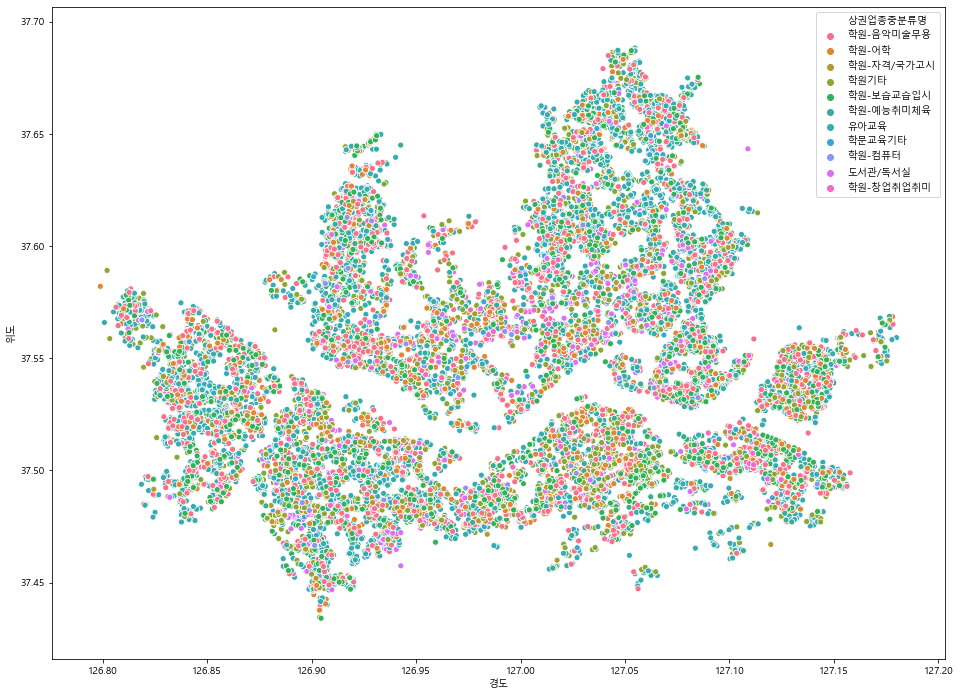

In [31]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_seoul_edu, x='경도',y='위도',hue='상권업종중분류명')

### 부동산과 관련된 정보 보기

In [32]:
shop_seoul_realty=shop_seoul[shop_seoul['상권업종대분류명']=='부동산']

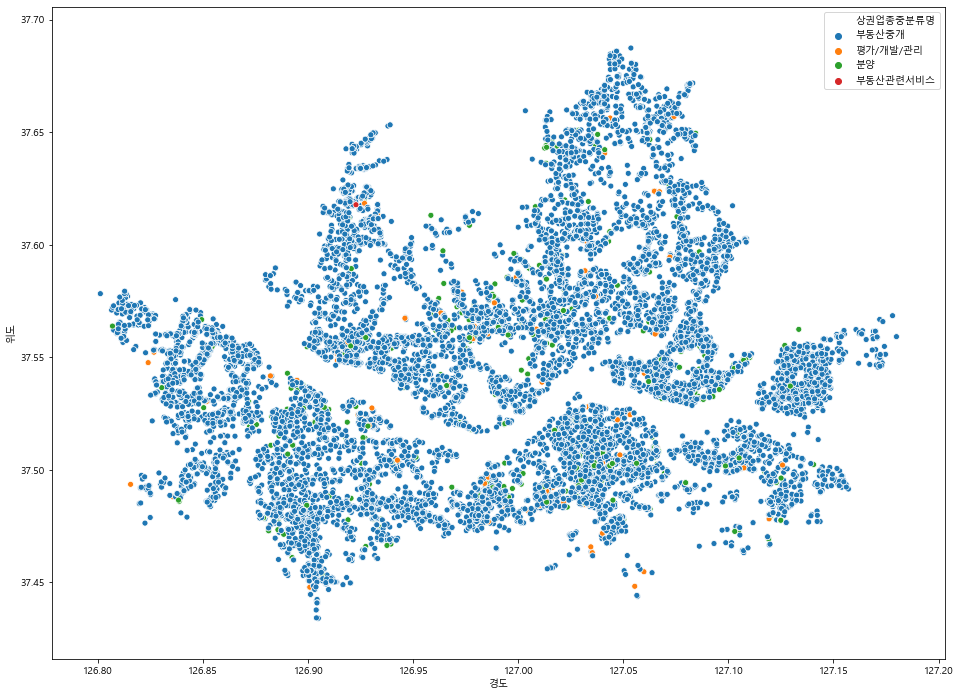

In [34]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_seoul_realty, x='경도',y='위도',hue='상권업종중분류명')

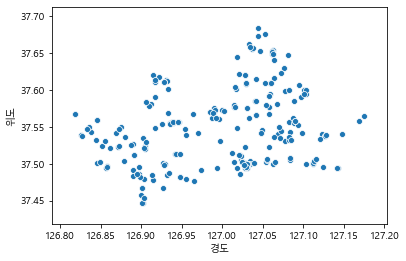

In [37]:
shop_seoul_edu_computer=shop_seoul[shop_seoul['상권업종중분류명']=='학원-컴퓨터']
sns.scatterplot(data=shop_seoul_edu_computer, x='경도',y='위도')

In [38]:
import folium

def show_market_map(geo_df):
    map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()],
                              zoom_start=11, tiles='Stamen Terrain')
    for n in geo_df.index:
        shop_name = geo_df.loc[n,'상호명'] + ' - ' + geo_df.loc[n,'도로명주소']
        folium.Marker([geo_df.loc[n,'위도'], geo_df.loc[n,'경도']],
                     popup=shop_name).add_to(map)
        
    return map

In [39]:
show_market_map(shop_seoul_edu_computer)

In [41]:
shop_seoul_eat = shop_seoul[shop_seoul['상권업종중분류명']=='커피점/카페']
shop_seoul_eat.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

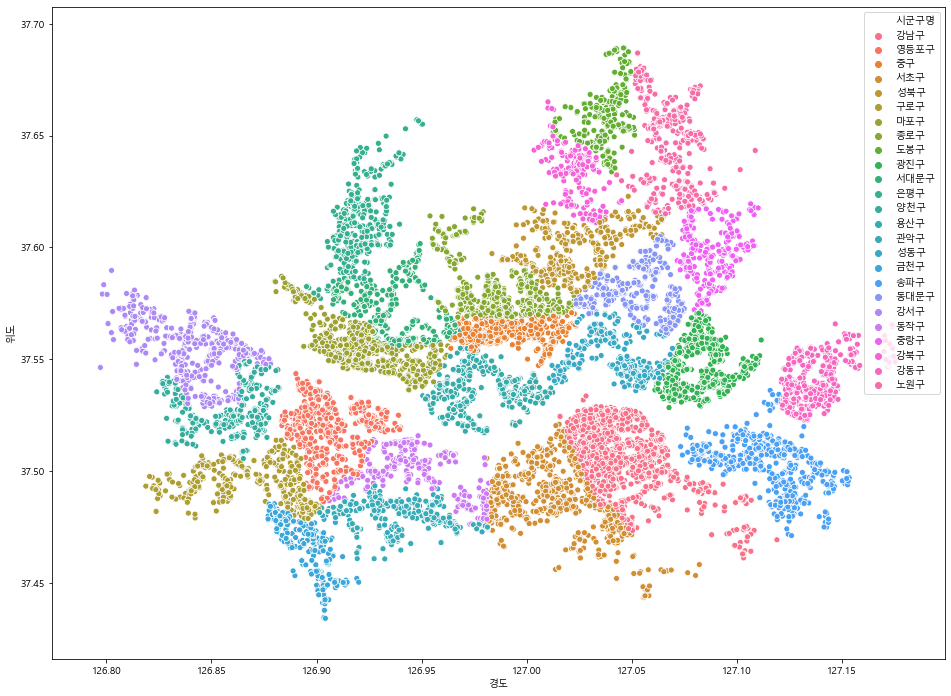

In [42]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_seoul_eat, x='경도', y='위도', hue='시군구명')

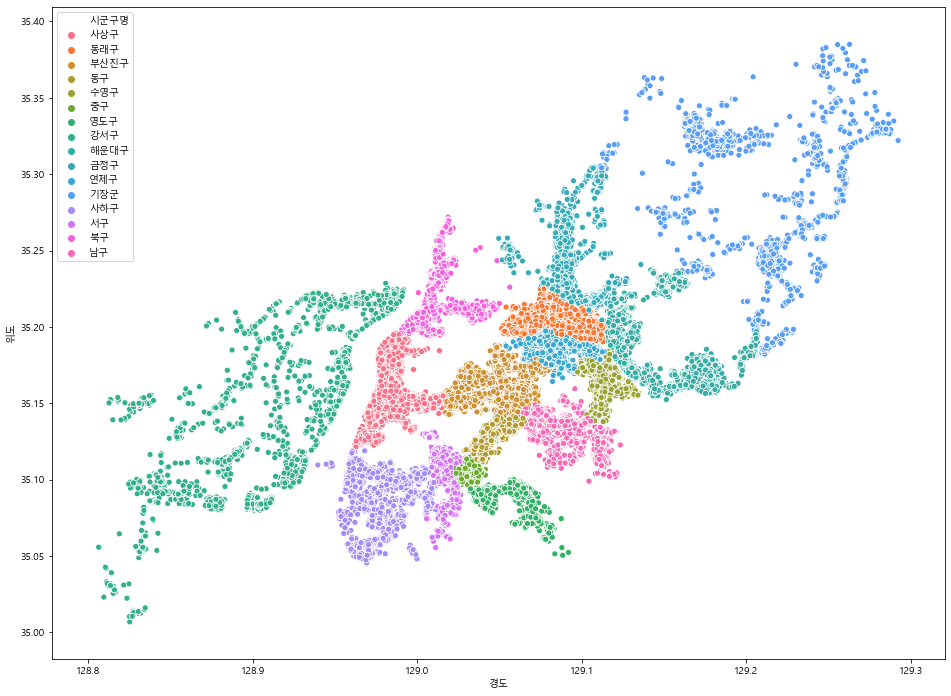

In [46]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=shop_except_seoul, x='경도', y='위도', hue='시군구명')